En esta clase veremos algunos ejemplos de utilización de Tesseract-OCR, una biblioteca creada por HP (y actualmente mantenida por Google) para realizar reconocimiento óptico de caracteres.

Importamos las bibliotecas que vamos a usar en la clase

In [2]:
import tesserocr # Para hacer OCR
import numpy as np # Para hacer manipulación básica de imágenes
import matplotlib.pyplot as plt # Para visualizar imágenes
from PIL import Image # Para cambiar el formato de archivos
%matplotlib inline

Importemos una imagen de prueba que contiene texto

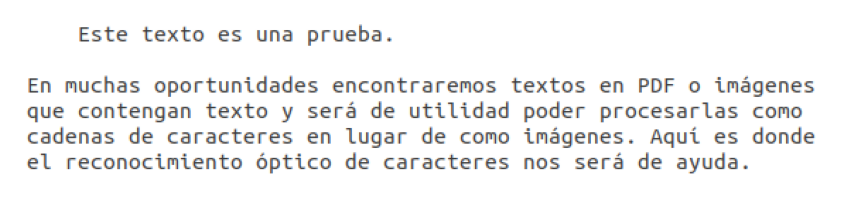

In [3]:
texto_largo = plt.imread('texto_largo.png')
plt.figure(figsize=(15,5))
plt.imshow(texto_largo)
plt.axis(False);

Usando la función `file_to_text` podemos convertir directamente el archivo a texto sin la necesidad de importarlo primero. 

In [4]:
texto_ocr = tesserocr.file_to_text('texto_largo.png', lang='spa')

In [5]:
type(texto_ocr)

str

In [6]:
print(texto_ocr)

Este texto es una prueba.

En muchas oportunidades encontraremos textos en PDF o imágenes
que contengan texto y será de utilidad poder procesarlas como
cadenas de caracteres en lugar de como imágenes. Aquí es donde
el reconocimiento óptico de caracteres nos será de ayuda.



Probemos otro ejemplo

In [7]:
img = plt.imread('imagen de prueba.png')

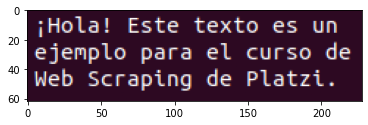

In [8]:
plt.imshow(img)

In [9]:
texto_ocr = tesserocr.file_to_text('imagen de prueba.png', lang='spa')
print(texto_ocr)

TITS RSS
SONO RTS
Meb Scraping de Platzi.



En este caso vemos que el reconocimiento no funciona demasiado bien. Esto es porque la imagen tiene las letras claras sobre un fondo oscuro y los bordes son un poco difusos. Vamos a usar Numpy para hacer un procesamiento básico de imágenes y ver si podemos mejorar el reconocimiento. (Para procesamientos más complejos de los que vamos a hacer ahora, te recomiendo que investigues la biblioteca OpenCV) 

Veamos qué forma tiene la imagen

In [10]:
img.shape

(62, 228, 4)

Es de 62x228 píxeles y tiene 4 canales (RGBA). Eliminemos el canal alpha ya que esta imagen no tiene transparencia

In [19]:
img_rgb = img[:,:,:3]

In [20]:
img_rgb.shape

(62, 228, 3)

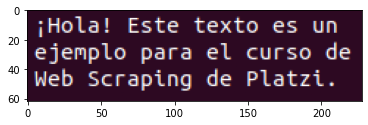

In [22]:
plt.imshow(img_rgb)

Los valores de cada píxel pueden estar entre 0 y 1 o entre 0 y 255 (usualmente). Veamos nuestro caso

In [ ]:
img_rgb[0,0,0]

Para invertir los colores, debemos tomar el complemento a 1 de cada píxel

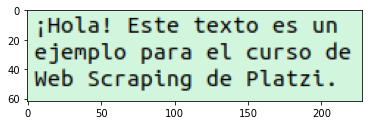

In [23]:
img_inv = 1 - img_rgb
plt.imshow(img_inv)

Ahora podemos condensar los 3 canales en uno solo, tomando el promedio para cada píxel

In [32]:
img_gr = img_inv.mean(axis=2)

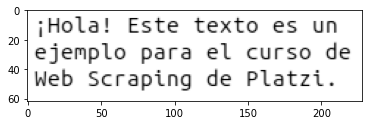

In [35]:
plt.imshow(img_gr, cmap='Greys_r')

Ya tenemos una imagen en escala de grises, con fondo blanco y letras oscuras. Intentemos nuevamente hacer OCR.

In [36]:
# Como ya tenemos la imagen cargada, debemos usar otra función
tesserocr.image_to_text(img_gr, lang='spa')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

Obtuvimos un error porque tesseract no está preparado para trabajar con arrays de numpy. Debemos convertir el formato a Image

In [37]:
img_pil = Image.fromarray(np.uint8(img_gr*255))

In [38]:
type(img_pil)

PIL.Image.Image

In [39]:
print(tesserocr.image_to_text(img_pil, lang='spa'))

¡Hola! Este texto es un
ejemplo para el curso de
Meb Scraping de Platzi.



Mucho mejor, pero seguimos teniendo un problema ya que este curso es de Web Scraping, no Heb Scraping. Tal vez perdimos demasiada información al pasar la imagen a escala de grises. Intentemos con la imagen invertida en RGB.

In [ ]:
img_pil_inv = Image.fromarray(np.uint8(img_inv*255))

In [ ]:
print(tesserocr.image_to_text(img_pil_inv, lang='spa'))